In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49610 entries, 0 to 49609
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    49610 non-null  int64  
 1   V1      49610 non-null  float64
 2   V2      49610 non-null  float64
 3   V3      49610 non-null  float64
 4   V4      49609 non-null  float64
 5   V5      49609 non-null  float64
 6   V6      49609 non-null  float64
 7   V7      49609 non-null  float64
 8   V8      49609 non-null  float64
 9   V9      49609 non-null  float64
 10  V10     49609 non-null  float64
 11  V11     49609 non-null  float64
 12  V12     49609 non-null  float64
 13  V13     49609 non-null  float64
 14  V14     49609 non-null  float64
 15  V15     49609 non-null  float64
 16  V16     49609 non-null  float64
 17  V17     49609 non-null  float64
 18  V18     49609 non-null  float64
 19  V19     49609 non-null  float64
 20  V20     49609 non-null  float64
 21  V21     49609 non-null  float64
 22

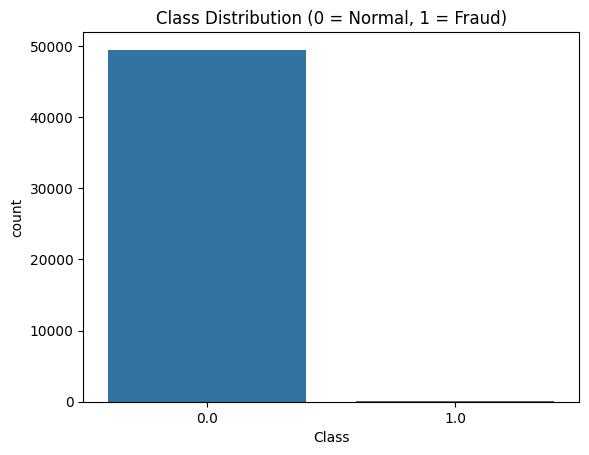

(49461, 31)
(148, 31)


In [3]:
data['Class'].value_counts()


sns.countplot(x='Class', data=data)
plt.title("Class Distribution (0 = Normal, 1 = Fraud)")
plt.show()



normal = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

print(normal.shape)
print(fraud.shape)


In [5]:
normal_sample = normal.sample(n=len(fraud), random_state=42)

balanced_data = pd.concat([normal_sample, fraud])


balanced_data['Class'].value_counts()


balanced_data = balanced_data.sample(frac=1, random_state=42)

In [6]:
X = balanced_data.drop('Class', axis=1)
y = balanced_data['Class']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



X_train.shape, X_test.shape

((236, 30), (60, 30))

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)



from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        34
         1.0       1.00      0.96      0.98        26

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



0.9833333333333333